# Volume-Based Support and Resistance Analysis

## Overview

Support and resistance levels are crucial concepts in technical analysis, representing price levels where a security has historically encountered obstacles in moving higher (resistance) or lower (support). Integrating volume analysis with support and resistance can provide additional insights into the strength and significance of these key levels.

## Functionality

The `plot_volume_levels` function is designed to analyze and visualize support and resistance levels based on trading volume. Here's a breakdown of its functionality:

1. **Volume Threshold Calculation:**
   - `volume_threshold = volume_factor * data['Volume'].mean()`: Calculates the volume threshold by multiplying the average volume by a specified factor. This threshold is used to identify significant volume levels.

2. **Support and Resistance Levels:**
   - `support_levels = data[data['Volume'] > volume_threshold]['Adj Close']`: Selects 'Adj Close' prices for rows where the volume exceeds the threshold, representing potential support levels.
   - `resistance_levels = data[data['Volume'] > volume_threshold]['Adj Close']`: Similar to support levels, these are prices associated with high volume, indicating potential resistance levels.

3. **Plotting:**
   - Creates a plot of closing prices, highlighting points where volume exceeds the threshold as support/resistance levels.

4. **Displaying Results:**
   - Prints unique support and resistance levels.

## Interpretation

The relationship between volume and support/resistance levels is interpreted as follows:

- **High Volume at Support:**
  - High volume at a support level suggests strong buying interest, potentially strengthening the support level.

- **High Volume at Resistance:**
  - High volume near resistance indicates strong selling interest, acting as a potential barrier for upward price movement.

- **Volume Confirmation:**
  - Volume can be used as confirmation for the validity of support or resistance levels, with high volume enhancing the reliability of the signals.

- **Market Interest Indicator:**
  - Significant changes in volume may indicate increased market interest, influenced by institutional investors, news events, or other factors.

In conclusion, the `analyze_volume` function provides a comprehensive analysis of support and resistance levels, incorporating volume information for a more nuanced understanding of potential price movements.


## 2. Import Libraries

In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## 3. Define Functions

### 3.1 fetch_historical_data

- Fetches historical stock price data from Yahoo Finance for a given list of assets within a specified date range.
- Provides flexibility for fetching data for a single stock or multiple stocks.

In [19]:
def fetch_historical_data(assets, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
    - assets (list or str): List of stock tickers or a single stock ticker as a string.
    - start_date (str): Start date for data retrieval in "YYYY-MM-DD" format.
    - end_date (str): End date for data retrieval in "YYYY-MM-DD" format.

    Returns:
    - pd.DataFrame: Historical stock price data including 'Adj Close' and 'Volume'.

    Example:
    >>> assets = {'AAPL', 'AMZN','TSLA'}
    >>> data = fetch_historical_data(assets, start_date = '2023-01-01', end_date = '2023-12-31')
    >>> print(data)
                 Adj Close                             Volume                     
                      AAPL        AMZN        TSLA       AAPL      AMZN       TSLA
    Date                                                                          
    2023-01-03  124.374802   85.820000  108.099998  112117500  76706000  231402800
    2023-01-04  125.657639   85.139999  113.639999   89113600  68885100  180389000
    2023-01-05  124.325073   83.120003  110.339996   80962700  67930800  157986300
    2023-01-06  128.899506   86.080002  113.059998   87754700  83303400  220911100
    2023-01-09  129.426575   87.360001  119.769997   70790800  65266100  190284000
    ...                ...         ...         ...        ...       ...        ...
    2023-12-22  193.600006  153.419998  252.539993   37122800  29480100   93249800
    2023-12-26  193.050003  153.410004  256.609985   28919300  25067200   86892400
    2023-12-27  193.149994  153.339996  261.440002   48087700  31434700  106494400
    2023-12-28  193.580002  153.380005  253.179993   34049900  27057000  113619900
    2023-12-29  192.529999  151.940002  248.479996   42628800  39789000  100615300

    [250 rows x 6 columns]

    """
    if isinstance(assets, str):
        assets = [assets]

    data = yf.download(assets, start=start_date, end=end_date)[['Adj Close', 'Volume']]
        
    return data

In [21]:
    >>> assets = {'AAPL', 'AMZN','TSLA'}
    >>> data = fetch_historical_data(assets, start_date = '2023-01-01', end_date = '2023-12-31')
    >>> print(data)

[*********************100%%**********************]  3 of 3 completed


3 Failed downloads:
['TSLA', 'AAPL', 'AMZN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-31)')



Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, AMZN), (Adj Close, TSLA), (Volume, AAPL), (Volume, AMZN), (Volume, TSLA)]
Index: []


### 3.2 Volume-Based Support/Resistance Levels

In [11]:
def plot_volume_levels(data, ticker, volume_factor=1.5, window=20):
    """
    Analyze volume-related indicators for a given stock.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock data.
    - ticker (str): Stock ticker.
    - volume_factor (float): Factor to determine the volume threshold.

    Returns:
    None (plots and prints analysis results).

    Example:
    >>> plot_volume_levels(data, 'AAPL', volume_factor=2.0)
    """
    # Define a threshold for considering a volume significant
    volume_threshold = volume_factor * data['Volume'].mean()

    # Calculate support and resistance levels
    support_levels = data[data['Volume'] > volume_threshold]['Adj Close'][data['Adj Close'] < data['Adj Close'].rolling(window=window).mean()]
    resistance_levels = data[data['Volume'] > volume_threshold]['Adj Close'][data['Adj Close'] > data['Adj Close'].rolling(window=window).mean()]

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plotting price chart with support and resistance levels
    ax1.plot(data['Adj Close'], label='Close Price', linestyle='-', color='blue')
    ax1.plot(data['Adj Close'].rolling(window=window).mean(), label='Moving Average', linestyle='--', color='black')
    ax1.scatter(data.index[data['Volume'] > volume_threshold], data['Adj Close'][data['Volume'] > volume_threshold],
                color='green', marker='o', label='Support/Resistance Level')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{ticker} Volume-Based Support and Resistance Levels')
    ax1.legend()
    ax1.grid(True)

    # Add vertical lines for support and resistance levels
    for level in support_levels.index:
        ax1.axvline(x=level, color='green', linestyle='--', linewidth=1)

    for level in resistance_levels.index:
        ax1.axvline(x=level, color='red', linestyle='--', linewidth=1)

    # Display the calculated support and resistance levels
    print("Support Levels:")
    print(support_levels.unique())

    print("\nResistance Levels:")
    print(resistance_levels.unique())

    # Plotting volume
    ax2.bar(data.index, data['Volume'], label='Volume', color='purple', alpha=0.1)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


[*********************100%%**********************]  1 of 1 completed


Support Levels:
[181.50546265 178.37380981 177.3263855  176.06803894 174.77972412]

Resistance Levels:
[149.98168945 153.64120483 154.3737793  172.86875916 176.77807617
 179.10186768 184.42764282 197.57000732]


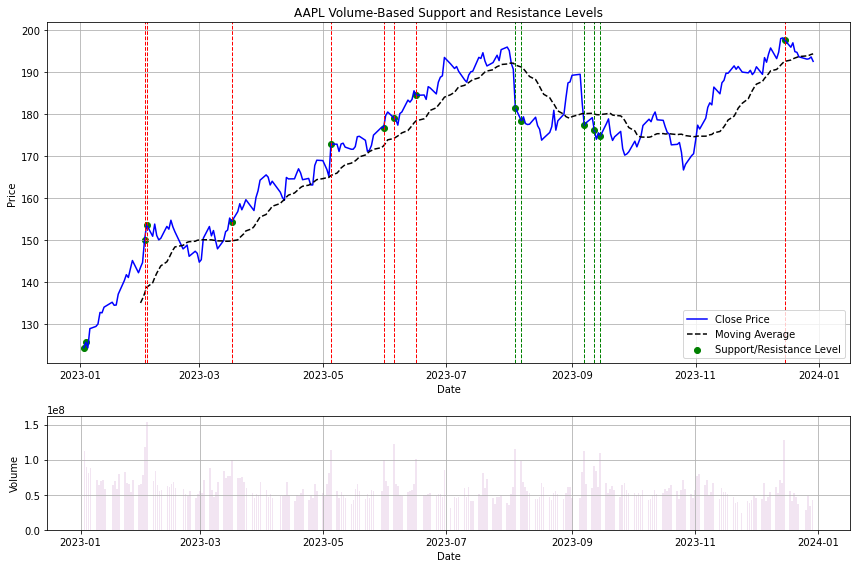

In [13]:
    >>> data = fetch_historical_data(assets = 'AAPL', start_date = '2023-01-01', end_date = '2023-12-31')
    >>> plot_volume_levels(data, ticker = 'AAPL', volume_factor=1.5, window=20)